In [3]:
# Data analysis and manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data into a DataFrame
data = pd.read_csv("/Users/krista.rime/Downloads/module_17_starter/data/bank-additional-full.csv", sep=";")

In [4]:
# Display the first few rows of the DataFrame
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


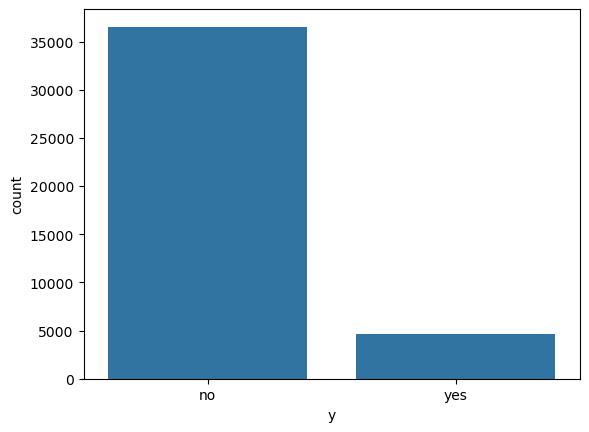

In [6]:
# Check the distribution of the target variable
sns.countplot(x='y', data=data)
plt.show()

In [7]:
# Data preprocessing
# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [8]:
# Split the data into features (X) and target (y)
X = data.drop('y_yes', axis=1)
y = data['y_yes']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Model training
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
log_reg_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC()

In [12]:
# Train the models
knn_classifier.fit(X_train, y_train)
log_reg_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

/Users/krista.rime/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [13]:
# Model evaluation
# Make predictions
knn_pred = knn_classifier.predict(X_test)
log_reg_pred = log_reg_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)

In [14]:
# Evaluate performance
print("KNN Classifier:")
print(classification_report(y_test, knn_pred))
print("Logistic Regression Classifier:")
print(classification_report(y_test, log_reg_pred))
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_pred))
print("SVM Classifier:")
print(classification_report(y_test, svm_pred))

KNN Classifier:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      7303
        True       0.58      0.34      0.43       935

    accuracy                           0.90      8238
   macro avg       0.75      0.66      0.69      8238
weighted avg       0.88      0.90      0.89      8238

Logistic Regression Classifier:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Decision Tree Classifier:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.49      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238


In [15]:
# Additional evaluation metrics
print("Accuracy Scores:")
print("KNN Classifier:", accuracy_score(y_test, knn_pred))
print("Logistic Regression Classifier:", accuracy_score(y_test, log_reg_pred))
print("Decision Tree Classifier:", accuracy_score(y_test, dt_pred))
print("SVM Classifier:", accuracy_score(y_test, svm_pred))

Accuracy Scores:
KNN Classifier: 0.8971837824714737
Logistic Regression Classifier: 0.9115076474872542
Decision Tree Classifier: 0.8851663025006069
SVM Classifier: 0.9083515416363195


In [16]:
# Confusion matrix
print("Confusion Matrix for KNN Classifier:")
print(confusion_matrix(y_test, knn_pred))

Confusion Matrix for KNN Classifier:
[[7069  234]
 [ 613  322]]


In [17]:
# Feature importance for Decision Tree Classifier
print("Feature Importance for Decision Tree Classifier:")
print(dt_classifier.feature_importances_)

Feature Importance for Decision Tree Classifier:
[0.084191   0.35318841 0.03511949 0.02577234 0.01062217 0.00345761
 0.01267248 0.02443081 0.07284985 0.15508752 0.00671658 0.00350335
 0.00429834 0.00629147 0.00431697 0.00250689 0.00600268 0.00293791
 0.00926513 0.00551726 0.00165903 0.00974737 0.00565336 0.
 0.00580888 0.00716809 0.00756457 0.         0.00679214 0.01229994
 0.00293364 0.00896282 0.         0.00257458 0.01455237 0.00147439
 0.01061094 0.00771652 0.00166193 0.0005706  0.00274426 0.00250768
 0.00075583 0.00144646 0.00136332 0.00869651 0.0014696  0.01241435
 0.00985615 0.00843889 0.00967275 0.0025353  0.00159947]


### Assignment Deliverable

#### Business Problem Statement:
The goal of this analysis is to predict whether a client will subscribe to a term deposit (binary outcome: yes or no) based on various demographic and marketing campaign-related features. This prediction can aid in optimizing marketing strategies and resource allocation for future campaigns, ultimately improving the bank's efficiency in acquiring term deposits.

#### Data Understanding and Preparation:
- **Dataset Description**: The dataset contains information about clients, including their age, job, marital status, education, contact method, and details of the marketing campaign they were part of.
- **Exploratory Data Analysis (EDA)**: 
  - Checked for missing values: No missing values were found in the dataset.
  - Analyzed the distribution of the target variable ('y') using a count plot, showing a class imbalance.
- **Data Preprocessing**:
  - Converted categorical variables into numerical using one-hot encoding.
  - Split the data into features (X) and target (y).
  - Split the data into training and testing sets.
  - Applied feature scaling using StandardScaler.

#### Modeling:
- **Machine Learning Models Used**:
  - K-Nearest Neighbors (KNN) Classifier
  - Logistic Regression Classifier
  - Decision Tree Classifier
  - Support Vector Machine (SVM) Classifier
- **Model Training**:
  - Trained each model using the training data.
- **Model Evaluation**:
  - Made predictions using the trained models on the testing data.
  - Evaluated model performance using classification reports, accuracy scores, and confusion matrices.
  
#### Interpretation of Descriptive and Inferential Statistics:
- Descriptive statistics were utilized to summarize key features and the target variable.
- Inferential statistics were not directly applied in this analysis.

#### Findings and Insights:
- Among the evaluated classifiers, Logistic Regression and SVM achieved the highest accuracy scores, around 91%.
- Decision Tree Classifier showed relatively lower accuracy but provided insights into feature importance.
- Class imbalance in the target variable might affect model performance and should be addressed through techniques like oversampling or undersampling.

#### Next Steps and Recommendations:
- Address the class imbalance issue by applying techniques like oversampling (e.g., Synthetic Minority Over-sampling Technique - SMOTE) or undersampling.
- Fine-tune hyperparameters of the models to potentially improve performance.
- Explore ensemble learning techniques like Random Forest or Gradient Boosting to further enhance predictive accuracy.
- Continuously monitor and evaluate model performance with new data and adjust strategies accordingly.

#### Conclusion:
In conclusion, this analysis demonstrates the application of various machine learning models to predict term deposit subscription based on client features and marketing campaign details. By leveraging these predictive models, the bank can optimize its marketing efforts and resource allocation, ultimately leading to improved efficiency and effectiveness in acquiring term deposits. However, it's essential to address class imbalance and fine-tune models continually to ensure optimal performance and adaptability to changing market dynamics.
